In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
!pip install seaborn

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gather Data

In [4]:
#upload the csv file
data = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Assessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#checking of null values
data_null = round(data.isna().sum() / data.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [7]:
# check the dublicated values
data.duplicated().sum()

0

In [8]:
data['Age'].fillna(data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [9]:
data.drop('Cabin', axis=1,inplace=True)

In [10]:
data_null = round(data.isna().sum() / data.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
data.describe(include = 'all').round(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN


In [13]:
data["PassengerId"].count()

891

In [14]:
data.set_index("PassengerId", inplace=True)

In [15]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Data visualization

In [16]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

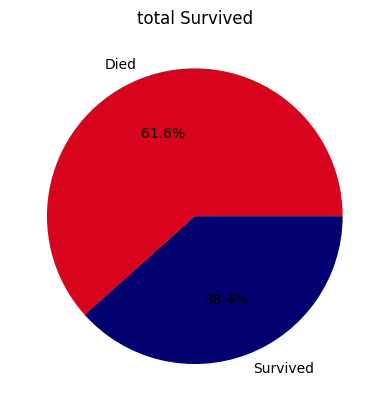

In [17]:
colors =['#d8031c','#01016f']
labels = ['Died','Survived',]
plt.pie(data['Survived'].value_counts(), labels=labels,colors=colors ,autopct='%1.1f%%')
plt.title('total Survived')
plt.show()

In [18]:
data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

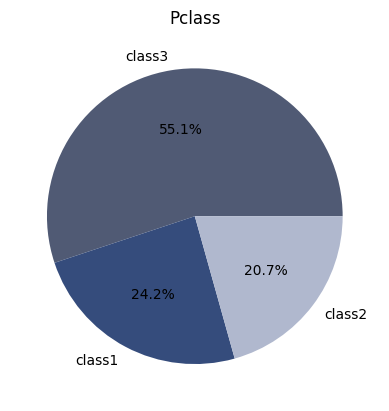

In [19]:
colors =['#505a74','#354c7c','#b0b8ce']
labels = ['class3','class1','class2']
plt.pie(data['Pclass'].value_counts(), labels=labels,colors=colors ,autopct='%1.1f%%')
plt.title('Pclass')
plt.show()

In [20]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

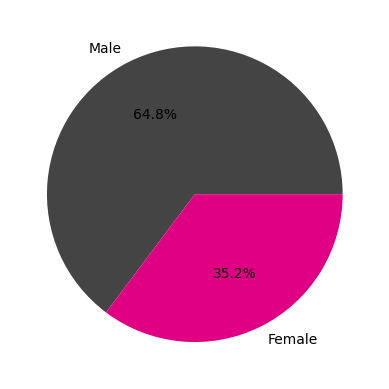

In [21]:
colors =['#444444','#e00084']
labels = ['Male','Female',]
plt.pie(data['Sex'].value_counts(), labels=labels,colors=colors ,autopct='%1.1f%%')
plt.show()

In [22]:
data["Age"].max()

80.0

In [23]:
data["Age"].min()

0.42

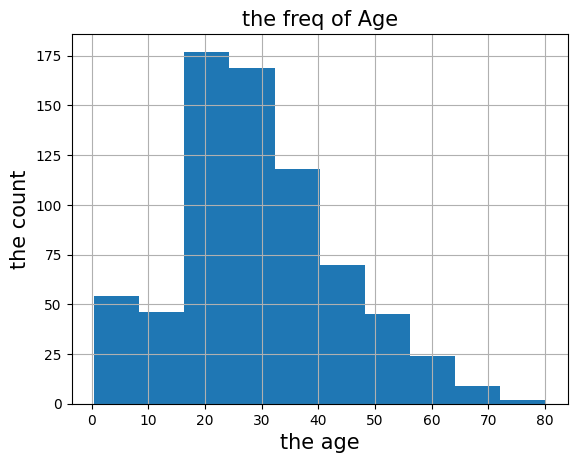

In [24]:
data.Age.hist()
plt.title("the freq of Age", fontsize=15)
plt.xlabel("the age", fontsize=15)
plt.ylabel("the count", fontsize=15)
plt.show()

/tmp/ipykernel_17/3957329992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], hist=False)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


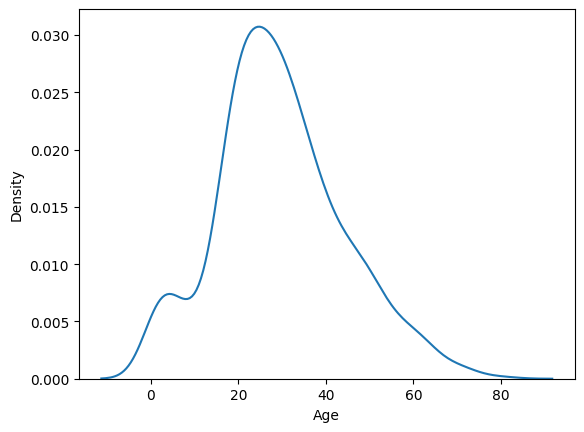

In [25]:
sns.distplot(data['Age'], hist=False)
plt.show()

In [26]:
data["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

/tmp/ipykernel_17/1081668215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SibSp'], hist=False)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


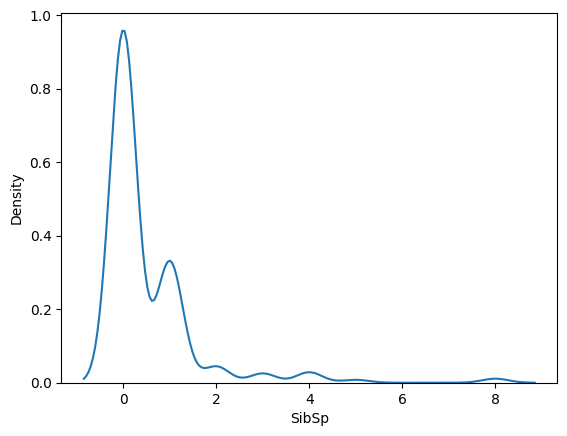

In [27]:
sns.distplot(data['SibSp'], hist=False)
plt.show()

In [28]:
data["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

/tmp/ipykernel_17/1122430822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Parch'], hist=False)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


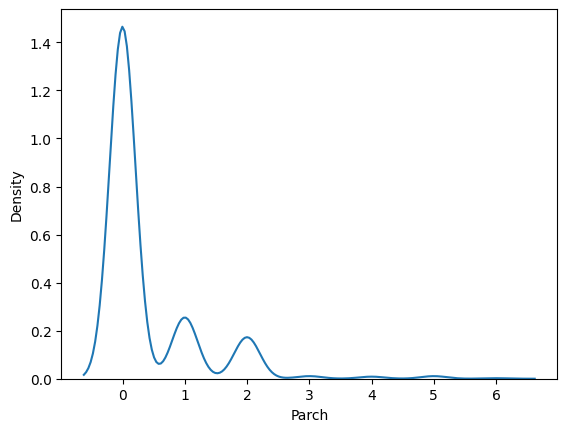

In [29]:
sns.distplot(data['Parch'], hist=False)
plt.show()

In [30]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

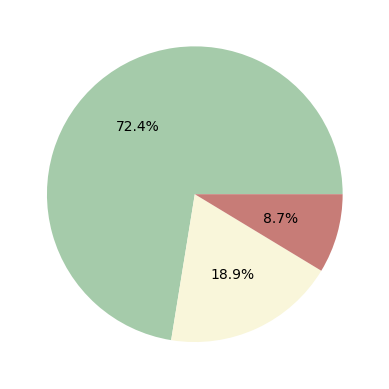

In [31]:
colors =['#a5cbaa','#f9f6da','#c77c77']
plt.pie(data['Embarked'].value_counts(),colors=colors ,autopct='%1.1f%%')
plt.show()

In [32]:
data.groupby("Sex").agg({
    "Survived" : "value_counts"
})

Survived
Sex    Survived          
female 1              233
       0               81
male   0              468
       1              109

In [33]:
data.groupby(data["Survived"]).agg({
    "Age" : "mean"
})

,Age
Survived,
0,30.626179
1,28.343690


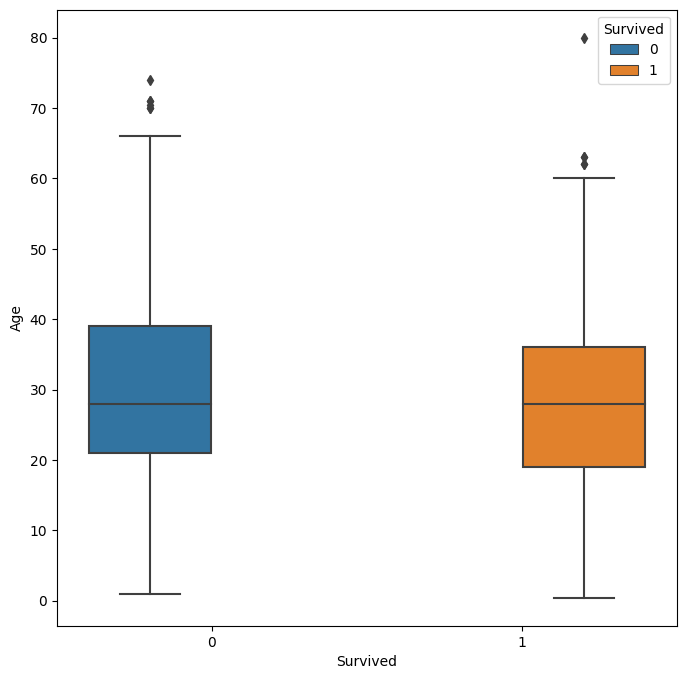

In [34]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", hue="Survived", data=data)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


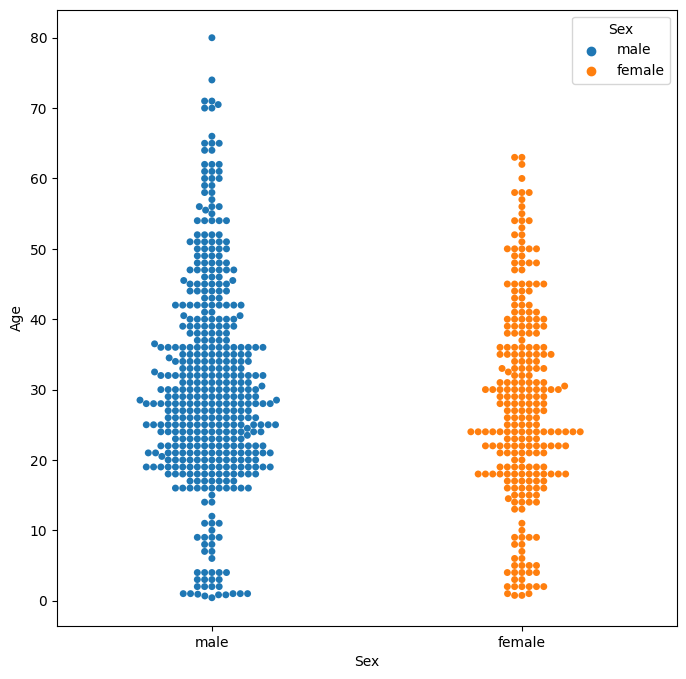

In [35]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex", y="Age",hue='Sex', data=data)
plt.show()

In [36]:
data.groupby("Pclass").agg({
    "Survived" : "value_counts"
})

Survived
Pclass Survived          
1      1              136
       0               80
2      0               97
       1               87
3      0              372
       1              119

In [37]:
data.groupby("Embarked").agg({
    "Survived" : "value_counts"
})

Survived
Embarked Survived          
C        1               93
         0               75
Q        0               47
         1               30
S        0              427
         1              217

In [38]:
data.groupby("SibSp").agg({
    "Survived" : "value_counts"
})

Survived
SibSp Survived          
0     0              398
      1              210
1     1              112
      0               97
2     0               15
      1               13
3     0               12
      1                4
4     0               15
      1                3
5     0                5
8     0                7

In [39]:
data.groupby(["Sex", "Pclass"]).agg({
    "Survived" : "value_counts"
})

Survived
Sex    Pclass Survived          
female 1      1               91
              0                3
       2      1               70
              0                6
       3      0               72
              1               72
male   1      0               77
              1               45
       2      0               91
              1               17
       3      0              300
              1               47

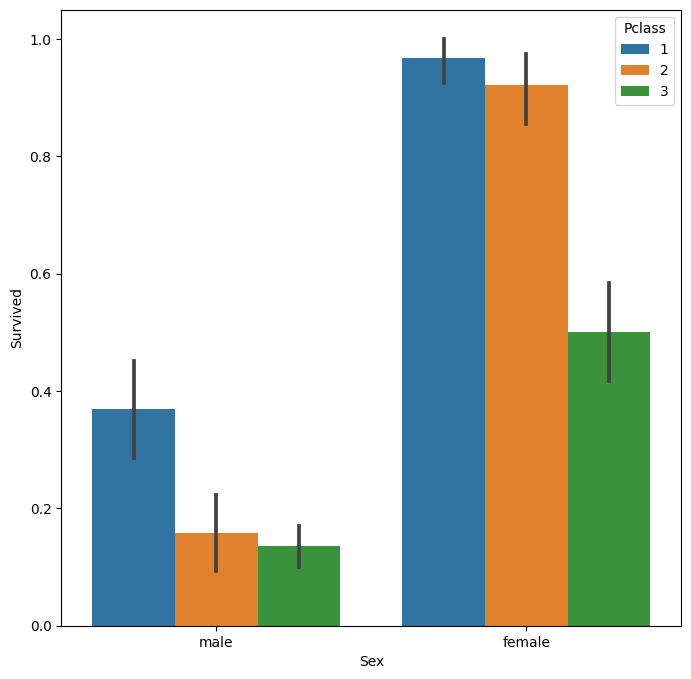

In [40]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=data)
plt.show()

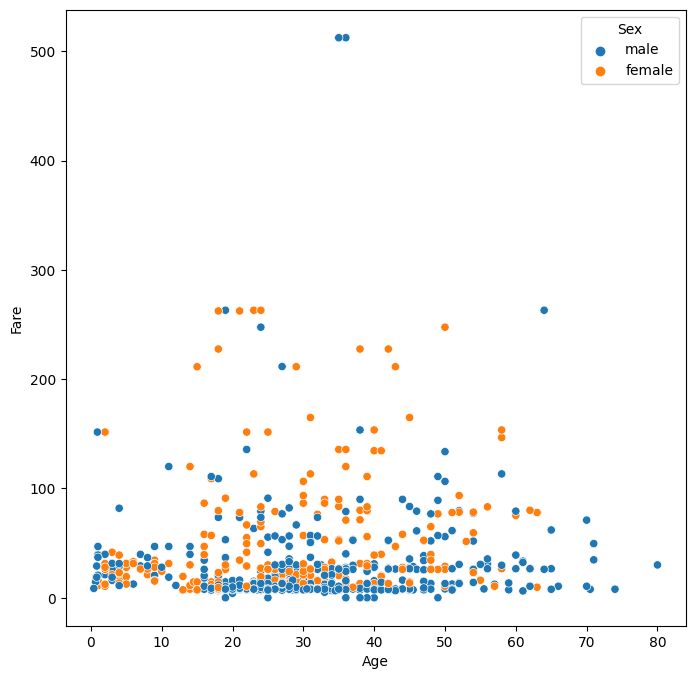

In [41]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=data)
plt.show()

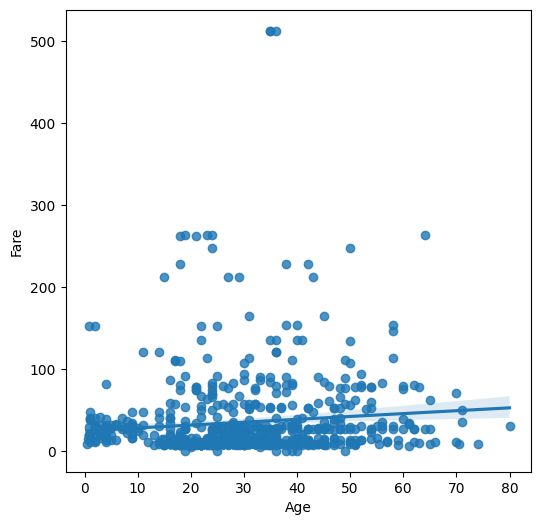

In [42]:
plt.subplots(figsize=(6, 6))
sns.regplot(x="Age", y="Fare", data=data)
plt.show()